**TIME SREIS AND DATA ANALYSIS** 

 **Mini -Project III**

Submitted by  : **Simthembile Dlamini**

Submitted to  : **Richard Amstrong**




** THEORETICAL QUESTIONS **

**1**

**i. what is the Lomb-Scargle (LS) periodogram ?**

**Ans:** The Lomb-Scargle periodogram is a common tool in the frequency analysis of unequally spaced data equivalent to least-squares fitting of sine waves.

**ii. what is it significance to astronomical data?**

**Ans:**
The Lomb-Scarge Periodogram provides a method for searching for periodicities in time-series data. It is comparable to the discrete Fourier Transform, but may be applied to irregularly sampled data. The periodogram gives as output the relative significance of a least-squares sinusoidal fit to the data as a function of frequency.

**2. What is the requirement on the time-series of computing the LS periodogram?**

**Ans:**

**3. Define the statistics of the LS-periodogram.? **

**Ans:** The Lomb-Scargle periodogram allows analytic computation of statistics for periodogram peaks. In reality, while this is true at individual frequencies, it is not true for the more relevant question of maximum peak heights across multiple frequencies, which must be either approximated or computed by bootstrap resampling.

**4. Calculate the statistical significance of peak power P=8.49 for N=30 independent frequencies and the
p=0.95, 0.99 and 0.999 confidence levels of the LS periodogram (taking into account the number of
trials, i.e. frequencies tested)**

**Ans:**

**PRACTICAL QUESTIONS** 

**QUESTION 1**

**Using Python/pandas, generate 1e 4 light curves taken from a Gaussian distribution. Calculate the
95%, 99% and 99.9% percentiles. How do they compare with the predicted values?**

**Ans:**


**QUESTION 2.** 

**(a).Generate a time-series consisting of an arbitrary-amplitude sinusoid and Gaussian noise. Compute
the LS-periodogram. Plot **

**Ans:**

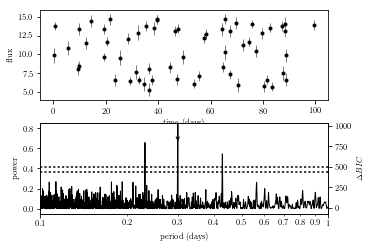

In [1]:
#----------------------------------------------------------------------------------------------------------------------#

# Importing the relevant preliminary imports and notebook setup

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#----------------------------------------------------------------------------------------------------------------------#

# Generate Data
np.random.seed(0)
N = 60
P = 0.3

t = np.random.randint(100, size=N) + 0.3 + 0.4 * np.random.random(N)
y = 10 + 4*np.sin(2 * np.pi * t / P)
dy = 0.5 + 0.5 * np.random.random(N)
y_obs = np.random.normal(y, dy)

#----------------------------------------------------------------------------------------------------------------------#

# Compute periodogram
period = 10 ** np.linspace(-1, 0, 10000)
omega = 2 * np.pi / period
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#----------------------------------------------------------------------------------------------------------------------#

# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#----------------------------------------------------------------------------------------------------------------------#

# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)
#----------------------------------------------------------------------------------------------------------------------#

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs, dy, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
ax.set_xlim(-5, 105)
#----------------------------------------------------------------------------------------------------------------------#

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
             arrowprops=dict(arrowstyle='->'))

ax1.set_xlim(period[0], period[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

#----------------------------------------------------------------------------------------------------------------------#

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()
#----------------------------------------------------------------------------------------------------------------------#

In [2]:

print('Lomb-Scargle detected period: %.2f' % (period[np.where(PS == max(PS))]))

Lomb-Scargle detected period: 0.30


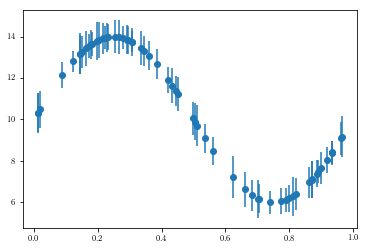

In [3]:
#----------------------------------------------------------------------------------------------------------------------#

# fold
period = 0.3                # period (must be known already!)

foldTimes = t / period      # divide by period to convert to phase
foldTimes = foldTimes % 1   # take fractional part of phase only (i.e. discard whole number part)

#----------------------------------------------------------------------------------------------------------------------#

# plot folded lightcurve
plt.errorbar(foldTimes,y,yerr=dy,linestyle='none',marker='o')  
plt.show()
#----------------------------------------------------------------------------------------------------------------------#


**QUESTION 3**

** Download a dataset of one of the objects in the AstroML.datasets LINEAR dataset*. Visualise the
dataset appropriately (for instance, by plotting the time series, distribution, etc).**

**Ans:**

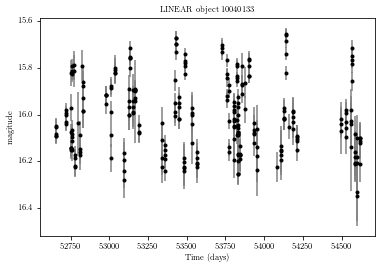

In [6]:
#----------------------------------------------------------------------------------------------------------------------#

from astroML.datasets import fetch_LINEAR_sample
LINEAR_data = fetch_LINEAR_sample()
star_id = 10040133
t, mag, dmag = LINEAR_data.get_light_curve(star_id).T
plt.clf()
fig, ax = plt.subplots()
ax.errorbar(t, mag, dmag, fmt='.k', ecolor='gray')
ax.set(xlabel='Time (days)', ylabel='magitude',
       title='LINEAR object {0}'.format(star_id))
ax.invert_yaxis();
plt.show()
#----------------------------------------------------------------------------------------------------------------------#

**QUESTION 4**

**Choose an appropriate Python package to compute the Lomb Scargle periodogram. Justify your choice
and then install the package. (Note: there is no ‘right answer’ to this question!)**

**Ans:** I used AstroML. **reason:** The goal of astroML is to provide a community repository for fast Python implementations of common tools and routines used for statistical data analysis in astronomy and astrophysics, to provide a uniform and easy-to-use interface to freely available astronomical datasets. hence choosen for this task.  

**QUESTION 5**

**Plot the LS periodogram**

**Ans:**

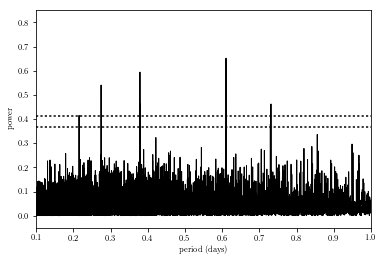

In [11]:
#----------------------------------------------------------------------------------------------------------------------#

periods = (10 ** np.linspace(-1, 0, 10000))
omega = 2.0 * np.pi / periods
PS = lomb_scargle(t, mag, dmag, omega, generalized=True)
plt.clf()

fig, ax1 = plt.subplots()
ax1.plot(periods, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([periods[0], periods[-1]], [sig1, sig1], ':', c='black')
ax1.plot([periods[0], periods[-1]], [sig5, sig5], ':', c='black')
#ax1.set_xscale('log')

ax1.set_xlim(periods[0], periods[-1])
ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

plt.show()
#----------------------------------------------------------------------------------------------------------------------#

**QUESTION 6**

**Identify by both eye and a computational tool the peaks in the dataset?**

**Ans:** we see the highest peaks are ............

**Ans:** with the computational tool are ............ 

In [8]:

print('Lomb-Scargle detected period: ' +  str(periods[np.where(PS >= 0.4)]))

Lomb-Scargle detected period: [ 0.21549309  0.27469065  0.37866732  0.37910357  0.61049002  0.73128457]


**QUESTION 7**

**Plot the phase-folded diagram using the calculated peak period.**


**Ans:**

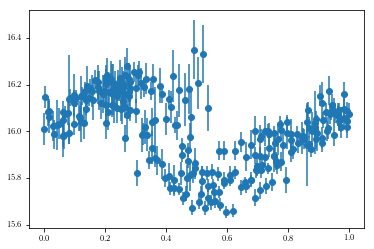

In [9]:
#----------------------------------------------------------------------------------------------------------------------#

periods = 10 ** np.linspace(-1, 0, 10000)
peak_period = periods[np.where(PS == max(PS))]

foldTimes = (t / peak_period)                  # divide by period to convert to phase
foldTimes = foldTimes % 1                      # take fractional part of phase only (i.e. discard whole number part)

#----------------------------------------------------------------------------------------------------------------------#

# plot folded lightcurve
plt.errorbar(foldTimes,mag,yerr=dmag,linestyle='none',marker='o')  
plt.show()
#----------------------------------------------------------------------------------------------------------------------#

**QUESTION 8**

**(a) Is this star of the RR Lyrae class?**

**Ans: **   Yes 

**(b) Use an appropriate template model fit to motivate your answer ** 

**Ans:**

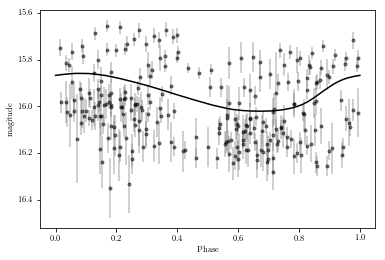

In [10]:
#----------------------------------------------------------------------------------------------------------------------#

# Compute phases of the obsevations
phase = (t /period) % 1
#----------------------------------------------------------------------------------------------------------------------#

# Compute best-fit RR Lyrae template
from gatspy.periodic import RRLyraeTemplateModeler
model = RRLyraeTemplateModeler('r').fit(t, mag, dmag)
phase_fit = np.linspace(0, 1, 1000)
mag_fit = model.predict(period * phase_fit, period=period)
#----------------------------------------------------------------------------------------------------------------------#

# Plot the phased data & model
fig, ax = plt.subplots()
ax.errorbar(phase, mag, dmag, fmt='.k', ecolor='gray', alpha=0.5)
ax.plot(phase_fit, mag_fit, '-k')
ax.set(xlabel='Phase', ylabel='magitude')
ax.invert_yaxis();
plt.show()
#----------------------------------------------------------------------------------------------------------------------#